<a href="https://colab.research.google.com/github/Iammanan07/Intel-Stock-Data-1980-2024-Analysis/blob/main/Intel_Stock_Data_(1980_2024)_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Importing Libraries.*

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



***READING CSV FILE AND BASIC CLEANING.***

In [6]:


from google.colab import files


uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
print(df.head())

# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)


Saving data.csv to data (1).csv
                        Date      Open      High       Low     Close  \
0  1980-03-17 00:00:00-05:00  0.181500  0.184404  0.181500  0.181500   
1  1980-03-18 00:00:00-05:00  0.181500  0.182952  0.180048  0.180048   
2  1980-03-19 00:00:00-05:00  0.184404  0.187308  0.184404  0.184404   
3  1980-03-20 00:00:00-05:00  0.184403  0.186581  0.183678  0.183678   
4  1980-03-21 00:00:00-05:00  0.180048  0.180048  0.177143  0.177143   

     Volume  Dividends  Stock Splits  
0  10924800        0.0           0.0  
1  17068800        0.0           0.0  
2  18508800        0.0           0.0  
3  11174400        0.0           0.0  
4  12172800        0.0           0.0  


***BASIC STASTICAL ANALYSIS.***

In [7]:
# Basic statistical analysis
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Summary Statistics:
                Open          High           Low         Close        Volume  \
count  11289.000000  11289.000000  11289.000000  11289.000000  1.128900e+04   
mean      14.986168     15.185892     14.787731     14.985933  5.064025e+07   
std       14.708247     14.892642     14.526521     14.709644  3.475946e+07   
min        0.121968      0.121968      0.120516      0.120516  0.000000e+00   
25%        0.810214      0.827638      0.797147      0.814571  2.744880e+07   
50%       12.757638     12.917269     12.590077     12.742243  4.456490e+07   
75%       22.624974     22.879999     22.350709     22.617407  6.459720e+07   
max       62.028760     62.292520     60.600833     62.083344  5.677088e+08   

          Dividends  Stock Splits  
count  11289.000000  11289.000000  
mean       0.001581      0.001373  
std        0.019592      0.051749  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.00

***DATA VISUALIZATION AND ANALYSIS.***

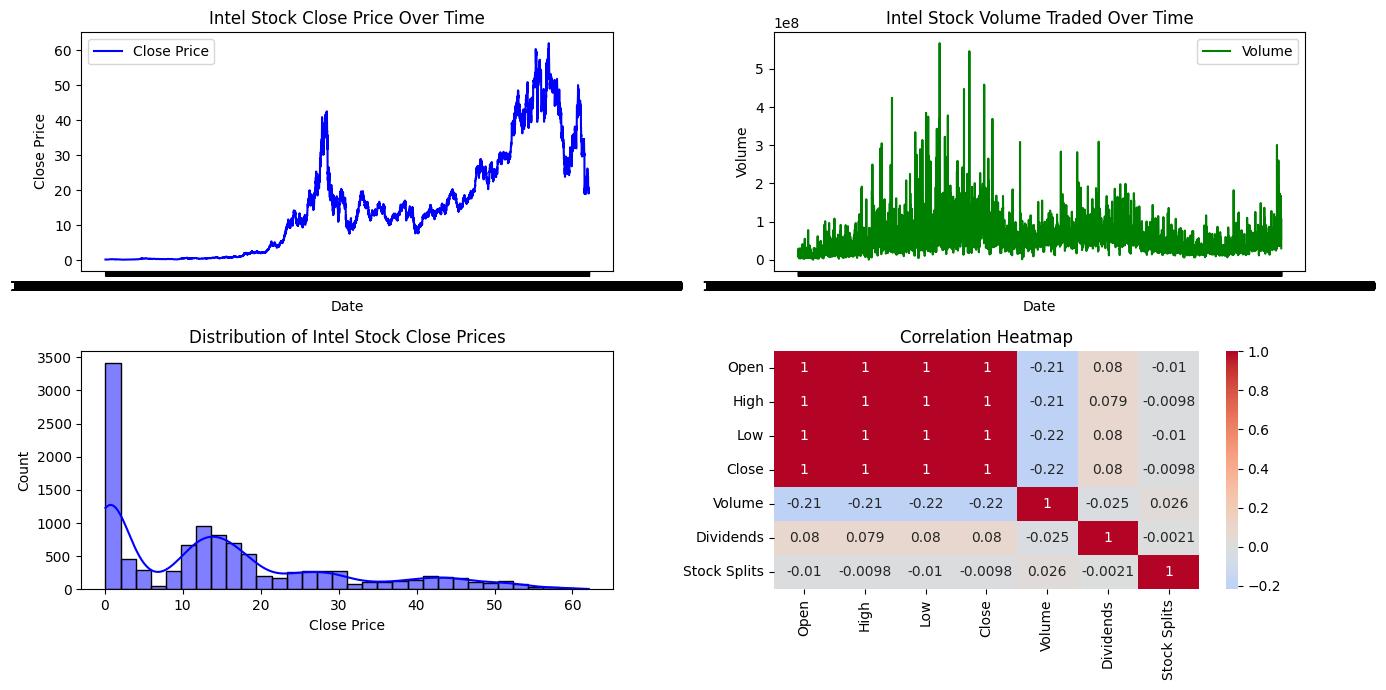

<ipython-input-8-49ab28cf92d4>:37: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


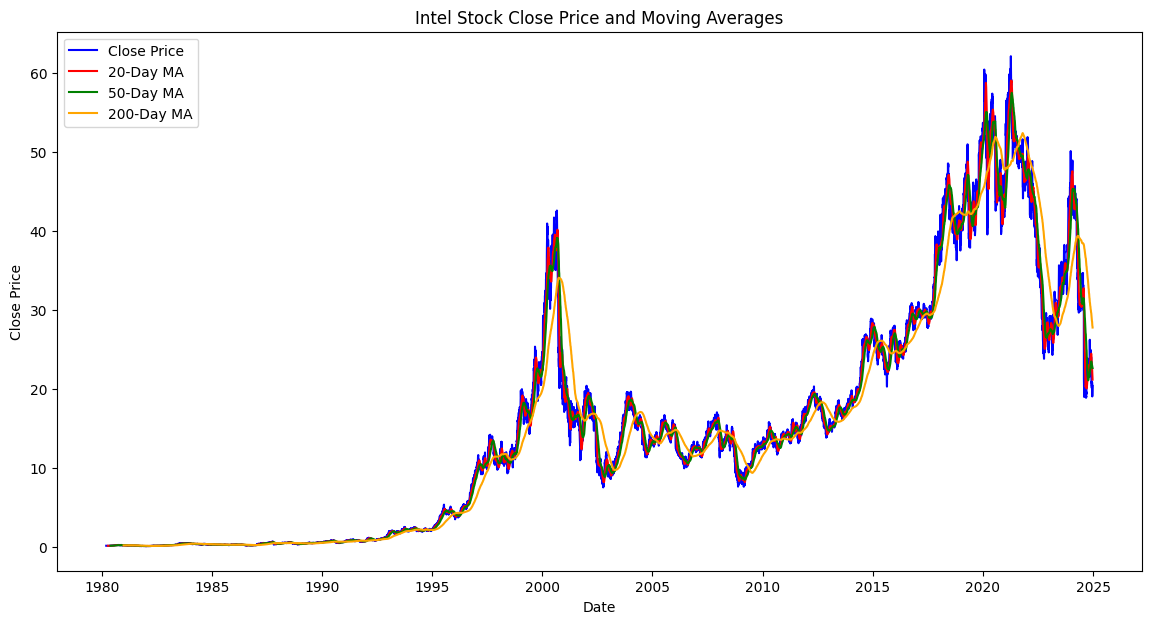

In [8]:
# Data visualization
plt.figure(figsize=(14, 7))

# Closing price over time
plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Intel Stock Close Price Over Time')
plt.legend()

# Volume traded over time
plt.subplot(2, 2, 2)
plt.plot(df['Date'], df['Volume'], label='Volume', color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Intel Stock Volume Traded Over Time')
plt.legend()

# Distribution of closing prices
plt.subplot(2, 2, 3)
sns.histplot(df['Close'], kde=True, color='blue')
plt.xlabel('Close Price')
plt.title('Distribution of Intel Stock Close Prices')

# Correlation heatmap (excluding Date column)
plt.subplot(2, 2, 4)
df_numeric = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Advanced analysis (e.g., moving averages)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['20_MA'] = df['Close'].rolling(window=20).mean()
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

# Plotting moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['20_MA'], label='20-Day MA', color='red')
plt.plot(df['50_MA'], label='50-Day MA', color='green')
plt.plot(df['200_MA'], label='200-Day MA', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Intel Stock Close Price and Moving Averages')
plt.legend()
plt.show()
